<a href="https://colab.research.google.com/github/ajeet7iitm/MLT_OPPE/blob/main/Rigression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [6]:
rnd=np.random.default_rng(seed=101)


In [7]:
rnd


Generator(PCG64) at 0x7C23712683C0

In [8]:
x_train=(np.arange(-2,2,0.01).reshape(1,-1))

In [13]:
x_train.shape

(1, 400)

In [10]:
y_train=(2*x_train**3+3*x_train**2+4+rnd.normal(0,1,x_train.shape[1]).reshape(1,-1)).T

In [14]:
y_train.shape

(400, 1)

In [21]:
y2=(2*x_train**3+3*x_train**2+4).reshape(1,-1).T

In [24]:
y2.shape

(400, 1)

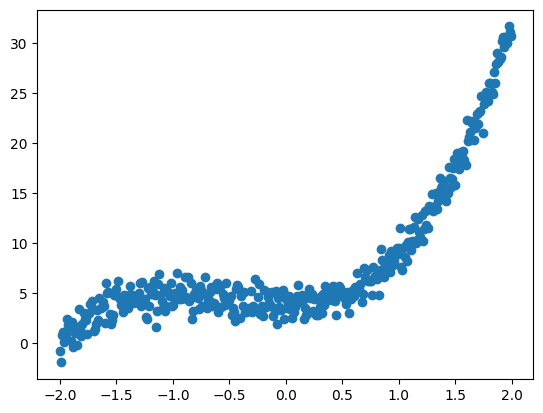

In [15]:
plt.scatter(x_train,y_train)

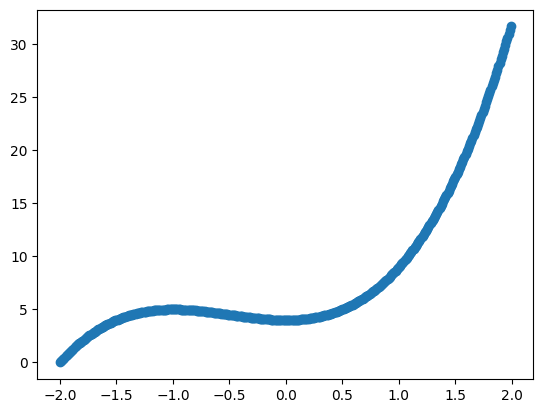

In [25]:
plt.scatter(x_train,y2)

In [26]:
rnd2=np.random.default_rng(seed=7)

In [28]:
x_test=np.arange(-2,2,0.02).reshape(1,-1)

In [37]:
y_test=(2*x_test**3+3*x_test**2+4+rnd2.normal(0,2,x_test.shape[1]).reshape(1,-1)).T

In [ ]:
y_test

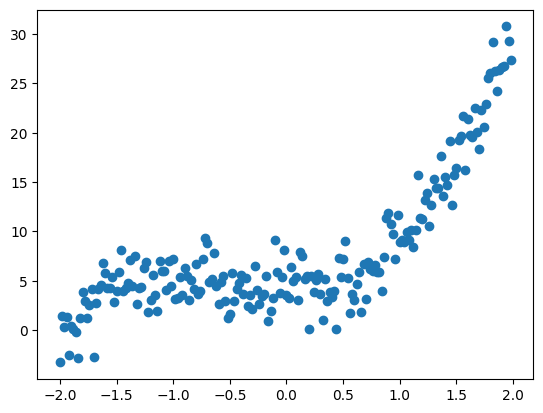

In [38]:
plt.scatter(x_test,y_test)